<a href="https://colab.research.google.com/github/joshuansu0897/NN_Examples/blob/main/clasificacion_binaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

**Descargamos los datos**

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

In [ ]:
train_data[0]

In [6]:
train_labels[0]

1

**Convertir los numeros en las palabras**

In [ ]:
word_index = imdb.get_word_index()
word_index

In [12]:
# vamos a cambiar de lugar las cosas, ahora el numero sera el id en vez de la palabra
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
word_index

**Verificamos que funcione el diccionario de palabras**

In [ ]:
for _ in train_data[0]:
  print(word_index.get(_ - 3))

**Creamos el metodo de vectorizacion**

In [18]:
def vectorizar(sequences, dim=10_000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences] = 1
  return results

**Vamos a crear nuestros datos de entrenamiento**

In [19]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Creamos los datos de validacion**

In [26]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

**Sigue crear nuestra estructura o modelo**

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

**Sigue entrenar a la red**

In [27]:
# esto es usando los datos que separamos arriba, los x_val y y_val
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

# esto es sin la necesidad de separar los datos, es mas rapido
# history = model.fit(
#     partial_x_train,
#     partial_y_train,
#     epochs=4,
#     batch_size=512,
#     validation_split=0.3 # el 30 porciento se usa para validar
# )

Epoch 1/4
30/30 [==============================] - 4s 43ms/step - loss: 0.5273 - accuracy: 0.7867 - val_loss: 0.4060 - val_accuracy: 0.8684
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3286 - accuracy: 0.8995 - val_loss: 0.3201 - val_accuracy: 0.8818
Epoch 3/4
30/30 [==============================] - 1s 21ms/step - loss: 0.2420 - accuracy: 0.9249 - val_loss: 0.2894 - val_accuracy: 0.8863
Epoch 4/4
30/30 [==============================] - 1s 21ms/step - loss: 0.1903 - accuracy: 0.9391 - val_loss: 0.2917 - val_accuracy: 0.8802


**Visualizamos el resultado de la red**

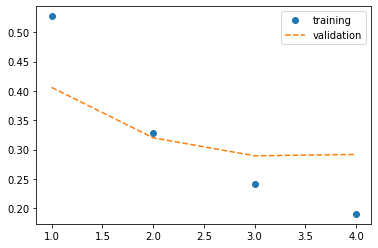

In [31]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

**Se estanco en la validacion, eso significa que tenemos** *Overfitting*

In [32]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3055 - accuracy: 0.8746


[0.30549877882003784, 0.8746399879455566]